# Bias and Variance
This code is implemented to to answer questions 4-7 in homework 4 of the Learning From Data course at Caltech: http://work.caltech.edu/homework/hw4.pdf

In this problem, we shall take a look at bias and variance trade-off in a learning model. Even though we can only calculate bias and variance in the case we have the target function at our disposal, the intuition of bias and variance can help us design our learning model more efficiently.

## Problem statement
Consider the case where the target function $f: [-1, 1] \to \mathbb{R}$ is given by $f(x) = \sin{(\pi x)}$ and the input probability distribution is uniform on $[-1, 1]$. Assume that the training set has only two examples (picked independently), and that the learning algorithm produces the hypothesis that minimizes the mean squared error on the examples.

### Question 4
Assume the learning model consists of all hypotheses of the form $h(x) = ax$. What is the expected value $\bar{g}(x)$?

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [2]:
# The target function sin(pi*x).
def targetFunction(x):
    return math.sin(math.pi * x)

In [3]:
# Implementation of linear regression for fitting a set of data points.
class LinearRegression:
    # This method receives the data points and finds a weight vector that best fits these points.
    @staticmethod
    def fit(X, Y):
        N = len(X) # Number of data points.
        d = len(X[0]) # Size of dimension.
        
        # Initialize matrix A to store the data points.
        A = np.zeros((N, d))
        # Initialize column vector b which stores the y values.
        b = np.zeros((N, 1))
        for i in range(N):
            A[i] = np.array(X[i])
            b[i] = Y[i]
            
        # Approximate Ax = b.
        AT = np.transpose(A)
        w = np.dot(np.dot(np.linalg.inv(np.dot(AT, A)), AT), b)

        return w

In [4]:
# Perform the experiment that is described in the problem statement.
def experiment(isPlot=False):
    N = 2
    # Generate 2 data points randomly.
    X = [random.uniform(-1, 1) for _ in range(N)]
    Y = [targetFunction(x) for x in X]
    
    # Optimal b for hypothesis: h(x) = b.
    W1 = LinearRegression.fit([[1], [1]], Y)
    
    # Optimal a for hypothesis: h(x) = ax.
    #opt_a2 = (X[0]*Y[0] + X[1]*Y[1]) / (X[0]*X[0] + X[1]*X[1])
    W2 = LinearRegression.fit([[X[0]], [X[1]]], Y)
    
    # Optimal a and b for hypothesis: h(x) = ax + b.
    W3 = LinearRegression.fit([[1, X[0]], [1, X[1]]], Y)
    
    # Optimal a for hypothesis: h(x) = ax^2.
    W4 = LinearRegression.fit([[X[0]*X[0]], [X[1]*X[1]]], Y)
    
    # Optimal a and b for hypothesis: h(x) = ax^2 + b.
    W5 = LinearRegression.fit([[1, X[0]*X[0]], [1, X[1]*X[1]]], Y)

    if isPlot:
        plt.xlim(-1, 1)
        plt.ylim(-1.5, 1.5)
        
        # Plot the target function.
        targetFunctionX = np.linspace(-1, 1, 100)
        targetFunctionY = [targetFunction(x) for x in targetFunctionX]
        plt.plot(targetFunctionX, targetFunctionY)

        # Plot N data points.
        plt.scatter(X, Y, color='r')

        # Plot the optimal line for hypothesis: y = ax.
        line_x = np.linspace(-1, 1, 100)
        line_y = [W2[0]*x for x in line_x]
        plt.plot(line_x, line_y)
    
    # Return the optimal weights for 5 hypotheses.
    return [W1, W2, W3, W4, W5]

[array([[ 0.14431903]]), array([[ 1.12836324]]), array([[ 0.24264806],
        [ 1.1709387 ]]), array([[-0.0976364]]), array([[ 3.48105353],
        [-6.97198719]])]

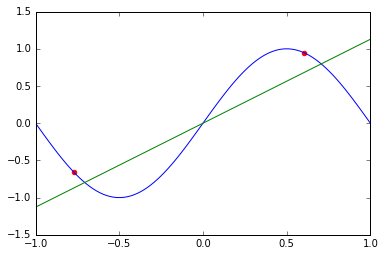

In [123]:
# Example: plot the target function along with a optimal hypothesis h(x) = a(x).
experiment(True)

In [5]:
# Calculate the average coefficient a in g(x) = ax, or g_bar.
N_experiments = 10000
A = [experiment()[1][0][0] for _ in range(N_experiments)]
avg_a = sum(A) / len(A)
print('Question 4: g_bar(x) = ', avg_a, 'x')
print('Answer: [d]')

Question 4: g_bar(x) =  1.42783163536 x
Answer: [d]


### Question 5 and 6
What is the closest value to the bias and variance?

In [28]:
# Compute bias, the squared difference between g_bar and the target function.
# Perform the experiment N times to get N optimal weights for 5 hypotheses.
# These weights are used to find the g_bar value of each hypothesis on the data points.
N = 1000
W = [experiment() for _ in range(N)]
bias = [0, 0, 0, 0, 0]

# Compute the average weight of each hypothesis.
W_avg = [0, 0, [0, 0], 0, [0, 0]]
for w in W:
    W_avg[0] += w[0][0][0] / N
    W_avg[1] += w[1][0][0] / N
    W_avg[2][0] += w[2][0][0] / N
    W_avg[2][1] += w[2][1][0] / N
    W_avg[3] += w[3][0][0] / N
    W_avg[4][0] += w[4][0][0] / N
    W_avg[4][1] += w[4][1][0] / N

# For each data point in our input space, calculate the squared difference between the average hypotheses
# with the target function. The squared differences are aggregated to find the bias of all 5 hypotheses. 
for x in np.linspace(-1, 1, N):
    V = [0, 0, 0, 0, 0]
    V[0] = W_avg[0]
    V[1] = W_avg[1]*x
    V[2] = W_avg[2][0] + W_avg[2][1]*x
    V[3] = W_avg[3]*x*x
    V[4] = W_avg[4][0] + W_avg[4][1]*x*x
    for i in range(5):
        bias[i] += (V[i] - targetFunction(x))**2

# Take the average, since we aggregate the biases all N data points
bias = [b/N for b in bias]

print('Question 5: bias = ', bias)
print('Answer: [b]')

Question 5: bias =  [0.49962730841954917, 0.26415868990379227, 0.2168263778501599, 0.50164673898254974, 7.1177952136161249]
Answer: [b]


In [31]:
# Compute variance, the squared difference between g_bar and each g we find in each experiment.
variance = [0, 0, 0, 0, 0]

# For each data point in our input space, calculate the average squared differences between the average hypotheses
# and every optimal hypothesis in N experiments.
for x in np.linspace(-1, 1, N):
    # V holds results of the average hypotheses on point x.
    V = [0, 0, 0, 0, 0]
    V[0] = W_avg[0]
    V[1] = W_avg[1]*x
    V[2] = W_avg[2][0] + W_avg[2][1]*x
    V[3] = W_avg[3]*x*x
    V[4] = W_avg[4][0] + W_avg[4][1]*x*x
    
    # Iterate through every optimal hypothesis in each of our N experiments.
    for w in W:
        variance[0] += (V[0] - w[0][0][0])**2
        variance[1] += (V[1] - w[1][0][0]*x)**2
        variance[2] += (V[2] - (w[2][0][0] + w[2][1][0]*x))**2
        variance[3] += (V[3] - w[3][0][0]*x*x)**2
        variance[4] += (V[4] - (w[4][0][0] + w[4][1][0]*x*x))**2

variance = [var/N/N for var in variance]
print('Question 6: variance = ', variance)
print('Answer: [a]')

Question 6: variance =  [0.24354109602715235, 0.23219591761625655, 1.846833561684569, 23.394515123372877, 2141.767598171286]
Answer: [a]


### Quesiton 7
Which of the following learning models has the least expected value out-of-sample error?
* $h(x) = b$
* $h(x) = ax$
* $h(x) = ax + b$
* $h(x) = ax^2$
* $h(x) = ax^2 + b$

In [33]:
# The out-of-sample error of each hypothesis is the sum of its bias and variance
E_out = [bias[i] + variance[i] for i in range(5)]
print('Question 7: E_out = ', E_out)
print('Answer: [b]')

Question 7: E_out =  [0.74316840444670151, 0.49635460752004879, 2.063659939534729, 23.896161862355427, 2148.8853933849023]
Answer: [b]
